Fetching updates from 2022-06-01T00:00:00 to 2022-06-03T00:00:00
Number of updates found: 240324
Fetching updates from 2022-06-03T00:00:00 to 2022-06-05T00:00:00
Number of updates found: 167686
Fetching updates from 2022-06-05T00:00:00 to 2022-06-07T00:00:00
Number of updates found: 192281
Fetching updates from 2022-06-07T00:00:00 to 2022-06-09T00:00:00
Number of updates found: 1042638
Fetching updates from 2022-06-09T00:00:00 to 2022-06-11T00:00:00
Number of updates found: 220933
Fetching updates from 2022-06-11T00:00:00 to 2022-06-13T00:00:00
Number of updates found: 237874
Fetching updates from 2022-06-13T00:00:00 to 2022-06-15T00:00:00
Failed to fetch data: 504. Retrying... (1/3)
Failed to fetch data: 504. Retrying... (2/3)
Number of updates found: 1597861
Fetching updates from 2022-06-15T00:00:00 to 2022-06-17T00:00:00
Number of updates found: 391268
Fetching updates from 2022-06-17T00:00:00 to 2022-06-19T00:00:00
Failed to fetch data: 502. Retrying... (1/3)
Number of updates foun

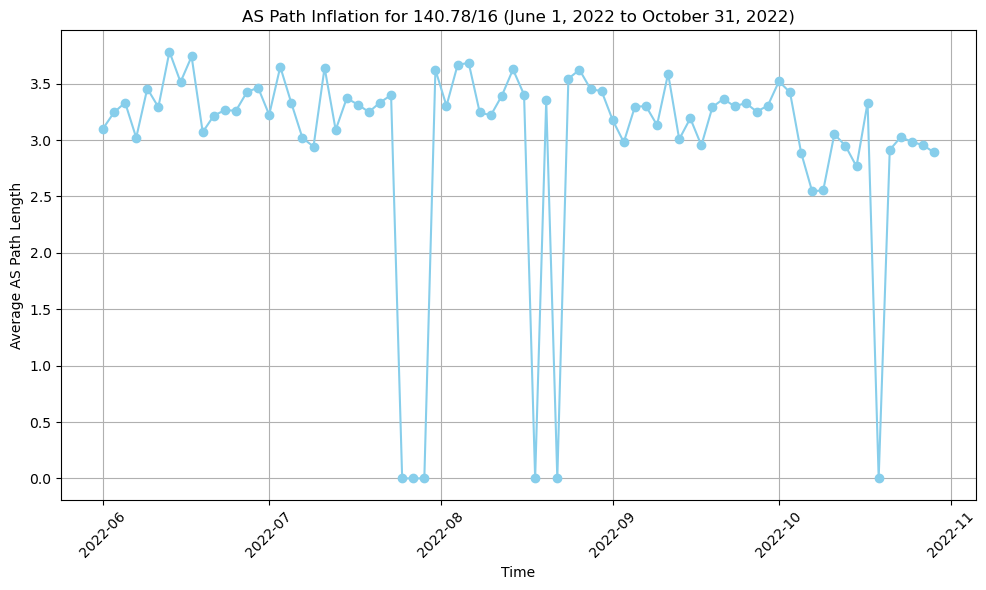

In [1]:
import requests
import datetime
import matplotlib.pyplot as plt
import time

# Function to fetch BGP updates from RIPEstat
def get_bgp_updates(resource, start_time, end_time, max_retries=3):
    url = f"https://stat.ripe.net/data/bgp-updates/data.json?resource={resource}&starttime={start_time}&endtime={end_time}"
    for attempt in range(max_retries):
        try:
            response = requests.get(url)
            if response.status_code == 200:
                data = response.json()
                if 'data' in data and 'updates' in data['data']:
                    return data['data']['updates']
                else:
                    print("No updates found in the response.")
                    return []
            else:
                print(f"Failed to fetch data: {response.status_code}. Retrying... ({attempt + 1}/{max_retries})")
        except Exception as e:
            print(f"Error: {e}. Retrying... ({attempt + 1}/{max_retries})")
        time.sleep(5)
    print(f"Max retries reached for interval: {start_time} to {end_time}. Skipping this interval.")
    return []

# Convert datetime to the required format
def datetime_to_string(dt):
    return dt.strftime('%Y-%m-%dT%H:%M:%S')

# Define the time range
start_time = datetime.datetime(2022, 6, 1)
end_time = datetime.datetime(2022, 10, 31)

# Resource of interest
resource = "AS17557"

# Initialize lists to store time intervals and corresponding average AS path lengths
time_intervals = []
avg_as_path_lengths = []

# Divide time range into 2-day chunks and fetch updates
current_time = start_time
while current_time < end_time:
    next_time = current_time + datetime.timedelta(days=2)
    start_time_str = datetime_to_string(current_time)
    end_time_str = datetime_to_string(next_time)
    print(f"Fetching updates from {start_time_str} to {end_time_str}")
    updates = get_bgp_updates(resource, start_time_str, end_time_str)
    
    # Check if updates are received for the current interval
    if not updates:
        print(f"No updates found for interval: {start_time_str} to {end_time_str}")
    else:
        print(f"Number of updates found: {len(updates)}")

    # Extract AS path lengths for the current interval
    as_path_lengths = []
    for update in updates:
        if 'attrs' in update and 'path' in update['attrs']:
            as_path = update['attrs']['path']
            as_path_lengths.append(len(as_path))
    
    # Calculate and store the average AS path length for the current interval
    if as_path_lengths:
        avg_as_path_length = sum(as_path_lengths) / len(as_path_lengths)
    else:
        avg_as_path_length = 0
    time_intervals.append(current_time)
    avg_as_path_lengths.append(avg_as_path_length)
    
    current_time = next_time

# Plot AS path inflation
plt.figure(figsize=(10, 6))
plt.plot(time_intervals, avg_as_path_lengths, marker='o', linestyle='-', color='skyblue')
plt.xlabel('Time')
plt.ylabel('Average AS Path Length')
plt.title('AS Path Inflation for 140.78/16 (June 1, 2022 to October 31, 2022)')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Fetching updates from 2022-07-25T00:00:00 to 2022-07-25T06:00:00
Number of updates found: 483489
Fetching updates from 2022-07-25T06:00:00 to 2022-07-25T12:00:00
Failed to fetch data: 502. Retrying... (1/3)
Number of updates found: 1251534
Fetching updates from 2022-07-25T12:00:00 to 2022-07-25T18:00:00
Number of updates found: 101103
Fetching updates from 2022-07-25T18:00:00 to 2022-07-26T00:00:00
Number of updates found: 74407
Fetching updates from 2022-07-26T00:00:00 to 2022-07-26T06:00:00
Number of updates found: 46937
Fetching updates from 2022-07-26T06:00:00 to 2022-07-26T12:00:00
Number of updates found: 65555
Fetching updates from 2022-07-26T12:00:00 to 2022-07-26T18:00:00
Number of updates found: 53241
Fetching updates from 2022-07-26T18:00:00 to 2022-07-27T00:00:00
Number of updates found: 61352
Fetching updates from 2022-07-29T00:00:00 to 2022-07-29T06:00:00
Number of updates found: 1031884
Fetching updates from 2022-07-29T06:00:00 to 2022-07-29T12:00:00
Number of updates fo

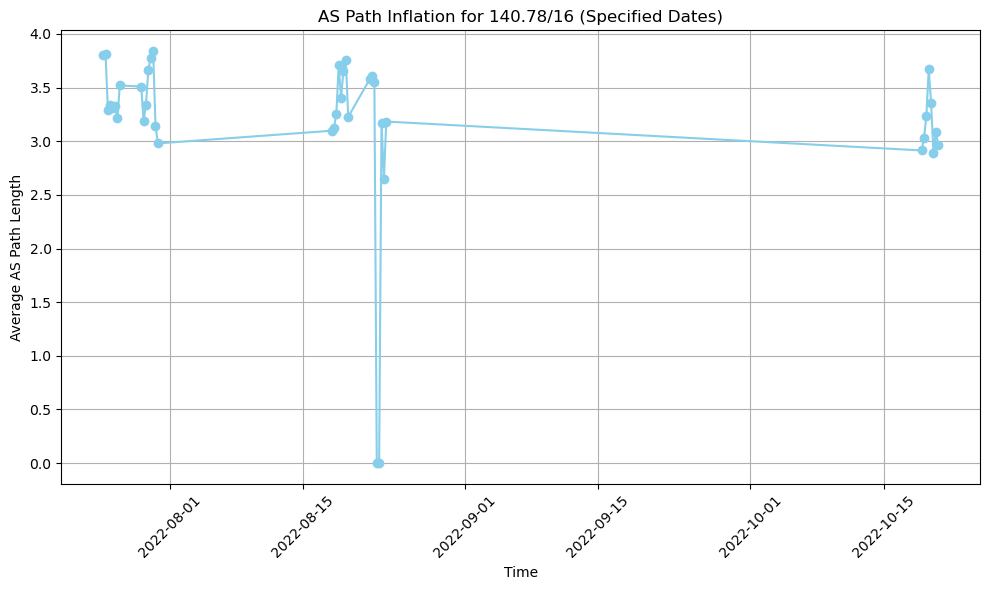

In [1]:
import requests
import datetime
import matplotlib.pyplot as plt
import time

# Function to fetch BGP updates from RIPEstat
def get_bgp_updates(resource, start_time, end_time, max_retries=3):
    url = f"https://stat.ripe.net/data/bgp-updates/data.json?resource={resource}&starttime={start_time}&endtime={end_time}"
    for attempt in range(max_retries):
        try:
            response = requests.get(url)
            if response.status_code == 200:
                data = response.json()
                if 'data' in data and 'updates' in data['data']:
                    return data['data']['updates']
                else:
                    print("No updates found in the response.")
                    return []
            else:
                print(f"Failed to fetch data: {response.status_code}. Retrying... ({attempt + 1}/{max_retries})")
        except Exception as e:
            print(f"Error: {e}. Retrying... ({attempt + 1}/{max_retries})")
        time.sleep(5)
    print(f"Max retries reached for interval: {start_time} to {end_time}. Skipping this interval.")
    return []

# Convert datetime to the required format
def datetime_to_string(dt):
    return dt.strftime('%Y-%m-%dT%H:%M:%S')

# Define the specific time ranges
date_ranges = [
    (datetime.datetime(2022, 7, 25), datetime.datetime(2022, 7, 27)),
    (datetime.datetime(2022, 7, 29), datetime.datetime(2022, 7, 31)),
    (datetime.datetime(2022, 8, 18), datetime.datetime(2022, 8, 20)),
    (datetime.datetime(2022, 8, 22), datetime.datetime(2022, 8, 24)),
    (datetime.datetime(2022, 10, 19), datetime.datetime(2022, 10, 21))
]

# Resource of interest
resource = "AS17557"

# Initialize lists to store time intervals and corresponding average AS path lengths
time_intervals = []
avg_as_path_lengths = []

# Fetch updates for each specified date range
for start_date, end_date in date_ranges:
    current_time = start_date
    while current_time < end_date:
        next_time = current_time + datetime.timedelta(hours=6)
        start_time_str = datetime_to_string(current_time)
        end_time_str = datetime_to_string(next_time)
        print(f"Fetching updates from {start_time_str} to {end_time_str}")
        updates = get_bgp_updates(resource, start_time_str, end_time_str)
        
        # Check if updates are received for the current interval
        if not updates:
            print(f"No updates found for interval: {start_time_str} to {end_time_str}")
        else:
            print(f"Number of updates found: {len(updates)}")

        # Extract AS path lengths for the current interval
        as_path_lengths = []
        for update in updates:
            if 'attrs' in update and 'path' in update['attrs']:
                as_path = update['attrs']['path']
                as_path_lengths.append(len(as_path))
        
        # Calculate and store the average AS path length for the current interval
        if as_path_lengths:
            avg_as_path_length = sum(as_path_lengths) / len(as_path_lengths)
        else:
            avg_as_path_length = 0
        time_intervals.append(current_time)
        avg_as_path_lengths.append(avg_as_path_length)
        
        current_time = next_time

# Plot AS path inflation
plt.figure(figsize=(10, 6))
plt.plot(time_intervals, avg_as_path_lengths, marker='o', linestyle='-', color='skyblue')
plt.xlabel('Time')
plt.ylabel('Average AS Path Length')
plt.title('AS Path Inflation for 140.78/16 (Specified Dates)')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


2-day period starting on 2022-07-25 00:00:00: Average AS Path Length = 3.452041678883961
2-day period starting on 2022-07-27 00:00:00: Average AS Path Length = 3.509694888185106
2-day period starting on 2022-07-29 00:00:00: Average AS Path Length = 3.4204392829662362
2-day period starting on 2022-07-31 00:00:00: Average AS Path Length = 3.0981612446958984
2-day period starting on 2022-08-02 00:00:00: Average AS Path Length = 3.123401352810777
2-day period starting on 2022-08-04 00:00:00: Average AS Path Length = 3.2534371310212333
2-day period starting on 2022-08-06 00:00:00: Average AS Path Length = 3.707923662278053
2-day period starting on 2022-08-08 00:00:00: Average AS Path Length = 3.4073085274895885
2-day period starting on 2022-08-10 00:00:00: Average AS Path Length = 3.6572045518152283
2-day period starting on 2022-08-12 00:00:00: Average AS Path Length = 3.75725215800464
2-day period starting on 2022-08-14 00:00:00: Average AS Path Length = 3.227733499562165
2-day period star

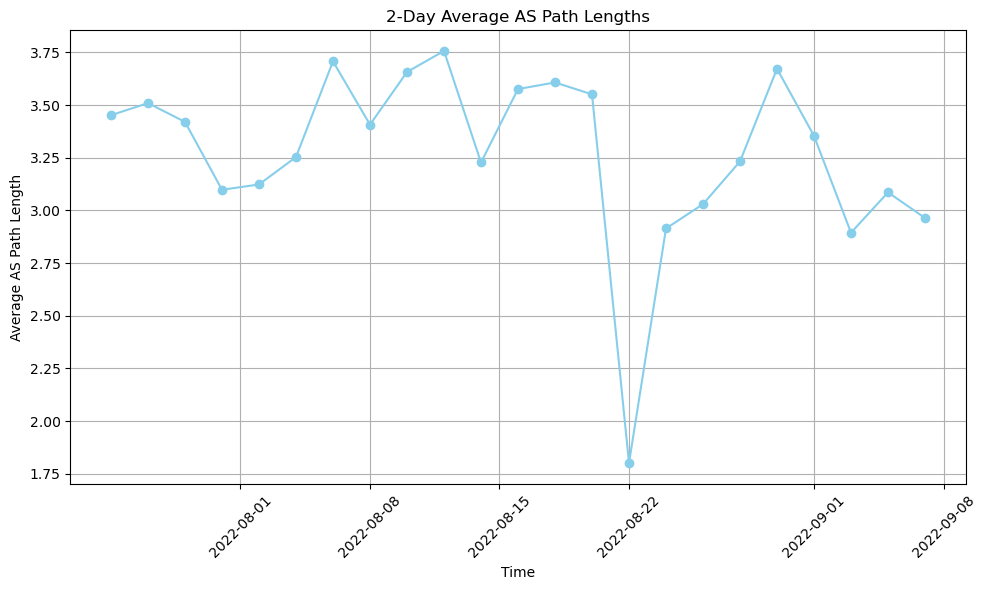

In [2]:
import datetime

# Assuming these are the lists obtained after running the previous script
# avg_as_path_lengths = [...]
# time_intervals = [...]

# Initialize lists to store 2-day periods and corresponding average AS path lengths
two_day_intervals = []
two_day_avg_as_path_lengths = []

# Initialize variables to keep track of the current 2-day period
current_period_start = time_intervals[0]
current_period_end = current_period_start + datetime.timedelta(days=2)
current_period_lengths = []

# Iterate over the data to calculate the 2-day averages
for i in range(len(time_intervals)):
    # If the current time interval is within the current 2-day period
    if time_intervals[i] < current_period_end:
        current_period_lengths.append(avg_as_path_lengths[i])
    else:
        # Calculate the average for the current 2-day period
        if current_period_lengths:
            two_day_avg = sum(current_period_lengths) / len(current_period_lengths)
        else:
            two_day_avg = 0
        two_day_intervals.append(current_period_start)
        two_day_avg_as_path_lengths.append(two_day_avg)

        # Reset variables for the next 2-day period
        current_period_start = current_period_end
        current_period_end = current_period_start + datetime.timedelta(days=2)
        current_period_lengths = [avg_as_path_lengths[i]]

# Calculate the average for the last 2-day period
if current_period_lengths:
    two_day_avg = sum(current_period_lengths) / len(current_period_lengths)
else:
    two_day_avg = 0
two_day_intervals.append(current_period_start)
two_day_avg_as_path_lengths.append(two_day_avg)

# Print the 2-day average AS path lengths
for interval, avg_length in zip(two_day_intervals, two_day_avg_as_path_lengths):
    print(f"2-day period starting on {interval}: Average AS Path Length = {avg_length}")

# Plot 2-day average AS path lengths
plt.figure(figsize=(10, 6))
plt.plot(two_day_intervals, two_day_avg_as_path_lengths, marker='o', linestyle='-', color='skyblue')
plt.xlabel('Time')
plt.ylabel('Average AS Path Length')
plt.title('2-Day Average AS Path Lengths')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
